<a href="https://colab.research.google.com/github/golladivy/OIBSIP-Data-Analytics/blob/main/Autocomplete_and_Autocorrect_Data_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/creditcard.csv')
df.shape

(160580, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,160580.000000,...,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000,160579.000000
mean,57480.545242,-0.207315,0.051732,0.565654,0.137480,-0.208785,0.065082,-0.094873,0.041622,0.021107,...,-0.035850,-0.100085,-0.026058,0.010271,0.106234,0.014743,0.001845,0.002501,87.343062,0.002217
std,24648.739896,1.845212,1.615910,1.355699,1.360672,1.333667,1.291085,1.210891,1.239136,1.161060,...,0.745918,0.655277,0.585846,0.596814,0.455527,0.493072,0.392889,0.310177,245.159473,0.047033
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,40115.750000,-1.005531,-0.528291,0.039585,-0.718119,-0.851388,-0.681213,-0.592292,-0.153410,-0.662940,...,-0.231759,-0.549532,-0.171314,-0.328744,-0.173936,-0.330606,-0.064278,-0.016428,5.450000,0.000000
50%,58415.500000,-0.232236,0.120630,0.675769,0.147207,-0.253136,-0.194186,-0.041671,0.064074,-0.083914,...,-0.059066,-0.079427,-0.039814,0.062089,0.149179,-0.060187,0.009761,0.022106,21.500000,0.000000
75%,75826.250000,1.173304,0.811237,1.326370,0.960994,0.329968,0.452844,0.446030,0.359376,0.651366,...,0.117804,0.337116,0.092439,0.413072,0.406889,0.279121,0.089580,0.078114,76.710000,0.000000
max,113472.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [8]:
df.isnull().values.any()

True

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160580 entries, 0 to 160579
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    160580 non-null  float64
 1   V1      160580 non-null  float64
 2   V2      160580 non-null  float64
 3   V3      160580 non-null  float64
 4   V4      160580 non-null  float64
 5   V5      160580 non-null  float64
 6   V6      160580 non-null  float64
 7   V7      160580 non-null  float64
 8   V8      160580 non-null  float64
 9   V9      160580 non-null  float64
 10  V10     160579 non-null  float64
 11  V11     160579 non-null  float64
 12  V12     160579 non-null  float64
 13  V13     160579 non-null  float64
 14  V14     160579 non-null  float64
 15  V15     160579 non-null  float64
 16  V16     160579 non-null  float64
 17  V17     160579 non-null  float64
 18  V18     160579 non-null  float64
 19  V19     160579 non-null  float64
 20  V20     160579 non-null  float64
 21  V21     16

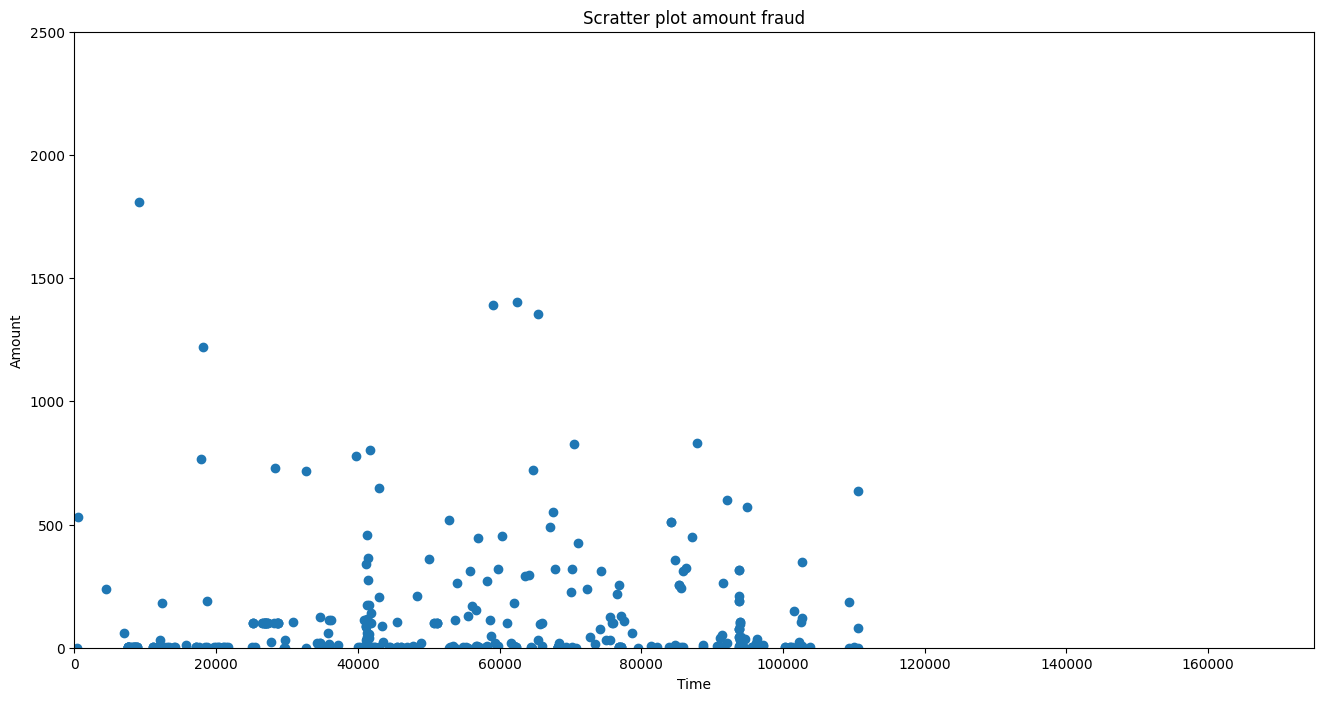

In [10]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(16,8))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

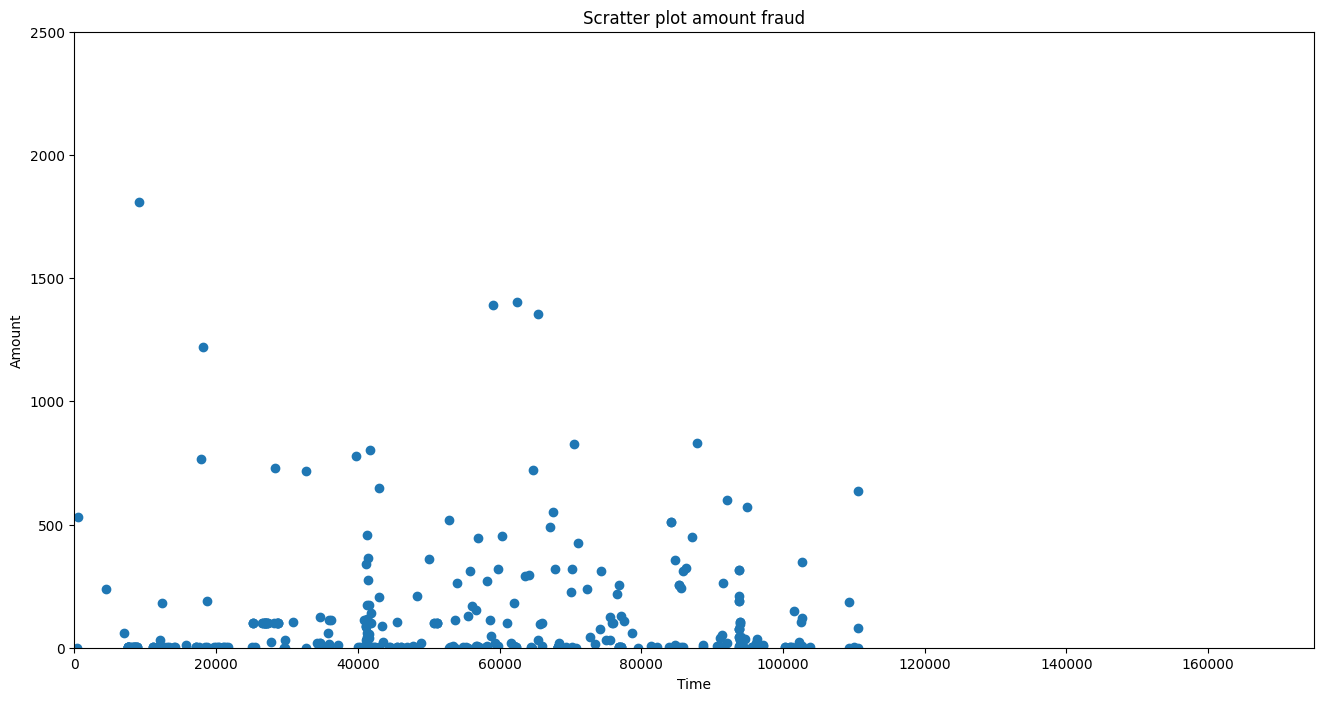

In [11]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(16,8))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [12]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 356 frauds in the original dataset, even though there are 160223 no frauds in the dataset.


In [13]:
df_corr = df.corr()

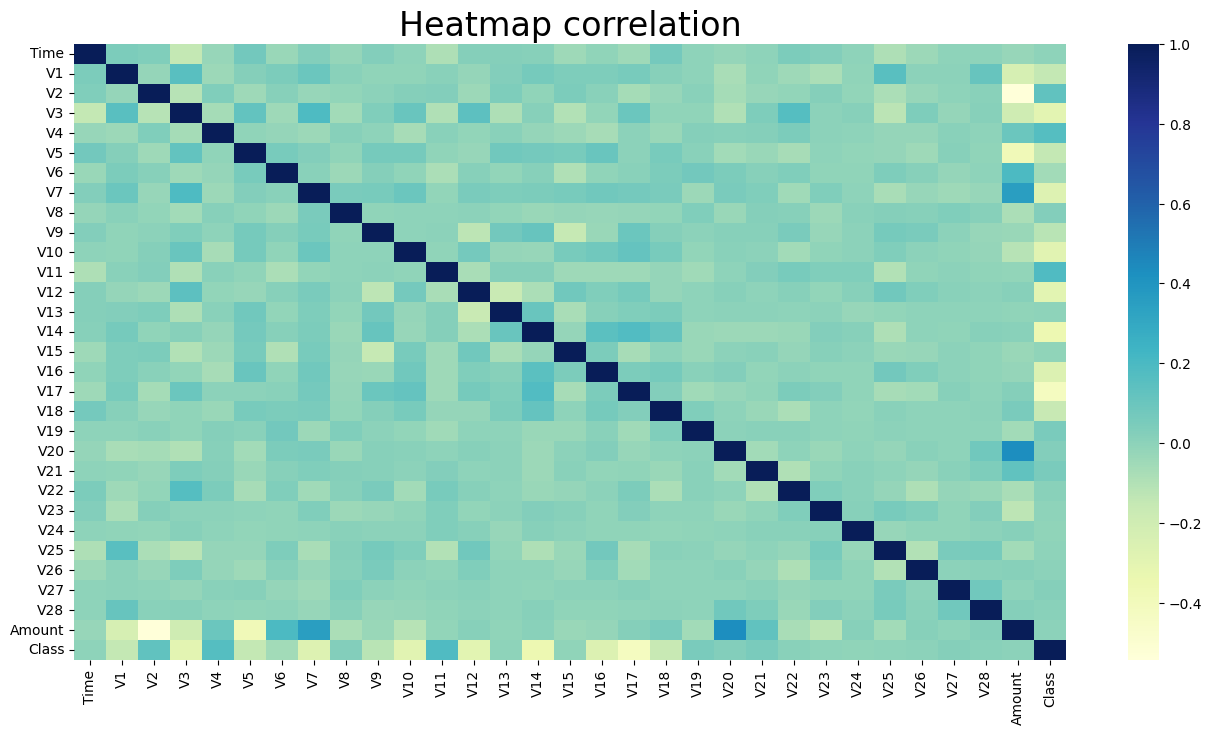

In [14]:
import seaborn
plt.figure(figsize=(16,8))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [15]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

In [16]:
pd.concat([Normal.Amount.describe(), Normal.Time.describe()],  axis=1)

,Amount,Time
count,160223.000000,160223.000000
mean,87.288266,57483.554571
std,245.193096,24636.498426
min,0.000000,0.000000
25%,5.480000,40121.000000
50%,21.520000,58424.000000
75%,76.565000,75821.000000
max,19656.530000,113472.000000


In [17]:
pd.concat([Fraud.Amount.describe(), Fraud.Time.describe()],  axis=1)

,Amount,Time
count,356.000000,356.000000
mean,112.005000,55968.873596
std,228.517058,29532.259316
min,0.000000,406.000000
25%,1.000000,34454.750000
50%,9.905000,55062.500000
75%,102.125000,84204.000000
max,1809.680000,110617.000000


In [18]:
print('Fraud Shape:\t', Fraud.shape)
print('Normal Shape:\t', Normal.shape)

Fraud Shape:	 (356, 31)
Normal Shape:	 (160223, 31)


In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['amount_scale'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scale'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [20]:
amount_scale = df['amount_scale']
time_scale = df['time_scale']

df.drop(['amount_scale', 'time_scale'], axis=1, inplace=True)
df.insert(0, 'amount_scale', amount_scale)
df.insert(1, 'time_scale', time_scale)

df.head()

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.797923,-1.635807,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.263963,-1.635807,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,5.012068,-1.635779,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.431378,-1.635779,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.680466,-1.635751,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [21]:
df = df.sample(frac=1)

fraud = df.loc[df['Class'] == 1]
normal = df.loc[df['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud, normal])

sample_data = normal_distributed_data.sample(frac=1, random_state=42)
sample_data.head(2)

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
34898,0.355038,-0.575195,0.878825,-0.209777,0.914813,0.956540,0.049122,1.829844,-0.730854,0.719738,...,-0.168756,0.175733,0.552908,0.120904,-1.044590,-0.037292,-0.352166,0.111853,0.020274,0.0
21142,1.438395,-0.753798,1.138931,-0.926406,-0.811278,-0.509301,1.245845,3.734908,-1.087887,0.887285,...,-0.165702,-0.227187,-0.555667,-0.123625,0.965895,0.506980,-0.296477,0.050281,0.051112,0.0


In [22]:
sample_data.shape

(848, 31)

In [23]:
X = sample_data.drop('Class', axis=1)
y = sample_data['Class']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.svm import SVC
svm_model = SVC()

In [26]:
svm_params = {"C": np.arange(1,10), "kernel":["linear", "rbf"]}

In [27]:
from sklearn.model_selection import GridSearchCV
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=7, n_jobs=-1, verbose=7).fit(X_train, y_train)

Fitting 7 folds for each of 18 candidates, totalling 126 fits


In [28]:
svm_cv_model.best_score_

0.9477791116446579

In [29]:
best_params = svm_cv_model.best_params_
print(best_params)

{'C': 1, 'kernel': 'rbf'}


In [30]:
svm = SVC(C = best_params['C'], kernel=best_params['kernel'], probability=True).fit(X_train, y_train)

In [31]:
y_pred_svm = svm.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svm)

0.9372549019607843

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X_train, y_train, cv=21).mean()

0.9476894205958246

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.94       138
         1.0       0.98      0.88      0.93       117

    accuracy                           0.94       255
   macro avg       0.94      0.93      0.94       255
weighted avg       0.94      0.94      0.94       255



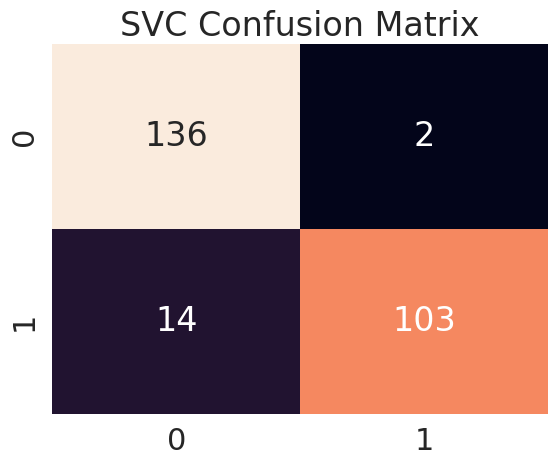

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('SVC Confusion Matrix')
plt.savefig('svc_con_mat')
plt.show()
